# Proyecto Analísis en el arrendamiento de Bicicletas en Seoul

## Introduccion
El objetivo de este proyecto es analisis y modelar las variables que tienen impacto en el arriendo de bicicletas en Seoul de tal forma poder tomar decisiciones entorno a planificación de inventario, mejorar estrategias de marketing o optimizacion de rutas y estaciones.

### Hipotesis
1. El clima es lo que genera el mayor impacto en el uso de la biciclita durante el año
2. La exposición de luz solar incentiva el uso de bicicleta
3. La falta de disponibilidad se debe a factores ajenos a lo que es el clima o el horario

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na option is deprecated")
df = pd.read_csv('SeoulBikeData.csv', encoding='latin-1')

Analizar las variables de las estaciones, feriados y disponibilidad

In [5]:
##df.columns

In [6]:
print(df.isna().sum())
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format= "%d/%m/%Y")
df['Week Day']=df['Date'].dt.day_name()

##df.dtypes

In [8]:
date = df['Date']
min_date = date.min()
max_date = date.max()

print(min_date, max_date)

2017-12-01 00:00:00 2018-11-30 00:00:00


In [9]:
week_day = df['Week Day']
week_day.value_counts()


Week Day
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [10]:
season = df['Seasons']
season.value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [11]:
holiday = df['Holiday']
holiday.value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [12]:
avaibable = df['Functioning Day']
avaibable.value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [13]:
##df[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)',
  ##  'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 
   ## 'Rainfall(mm)', 'Snowfall (cm)']].value_counts()

Una mirada rapida entre las distinas columnas para visualizar todas las relaciones.

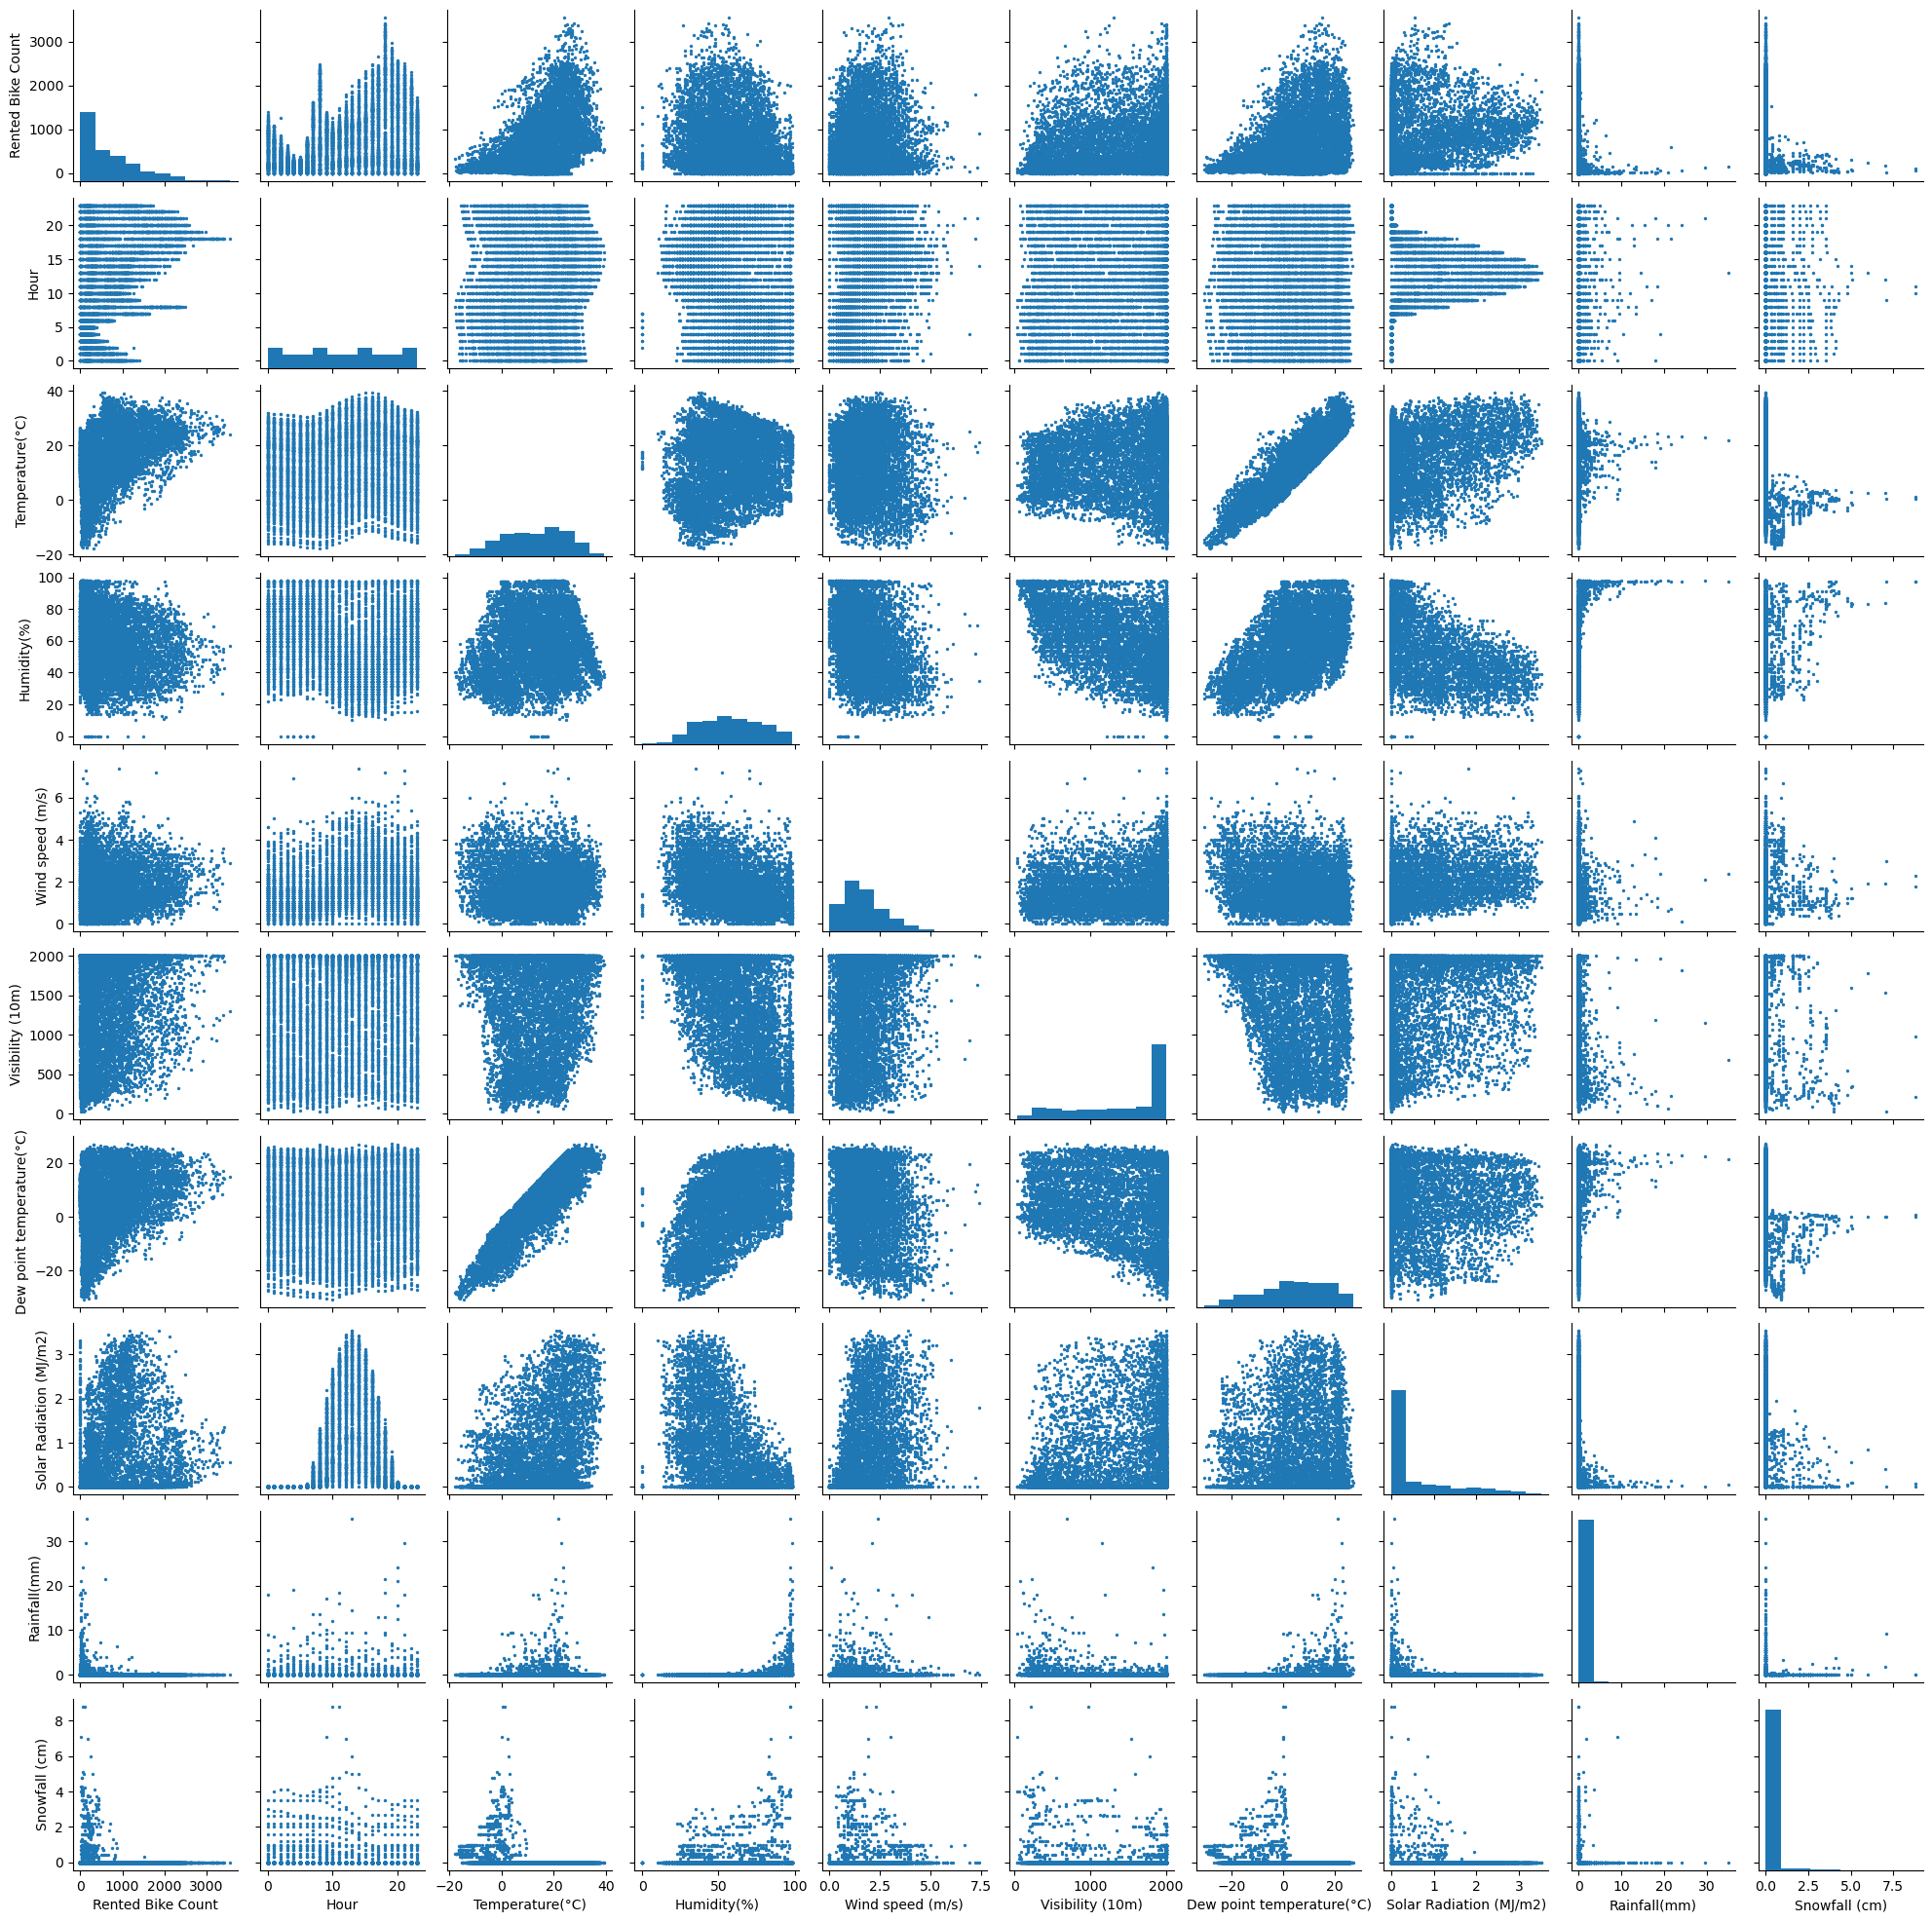

In [15]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=2)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=2)
g.fig.set_size_inches(20, 20)

Entender como las estaciones del año afectan el arrendamiento de bicicletas

Text(0.5, 1.0, 'Seasons')

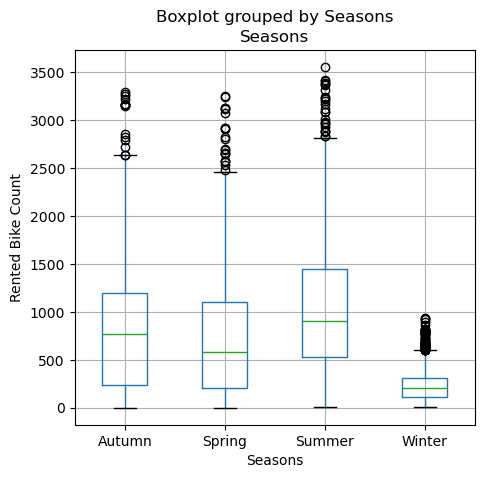

In [17]:
ax = df.boxplot(column = "Rented Bike Count",
                by='Seasons',
                figsize=(5, 5))
ax.set_ylabel('Rented Bike Count')
ax.set_title('Seasons')

Ver si el aumento del arrendamiento de bicicletas aumentan por los feriados

Text(0.5, 1.0, 'Holiday')

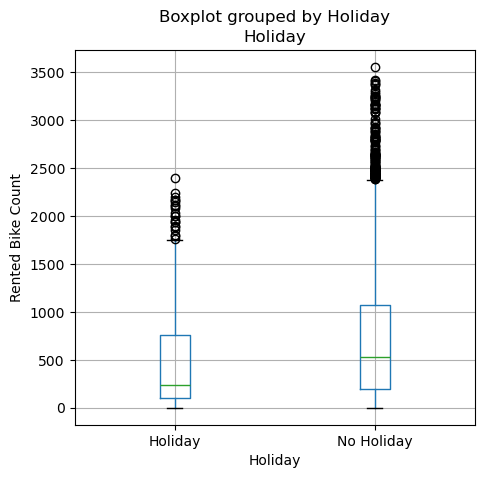

In [19]:
ax = df.boxplot(column = "Rented Bike Count",
                by='Holiday',
                figsize=(5, 5)
               )
ax.set_ylabel('Rented Bike Count')
ax.set_title('Holiday')

Entender como las horas del dia afectan en el aumento del uso de Bicicleta en Seoul durante las 24 horas del día

Ver como la temperatura, humedad y velocidad del viento influyen en el arriendo de bicicleta en Seoul

<Axes: xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

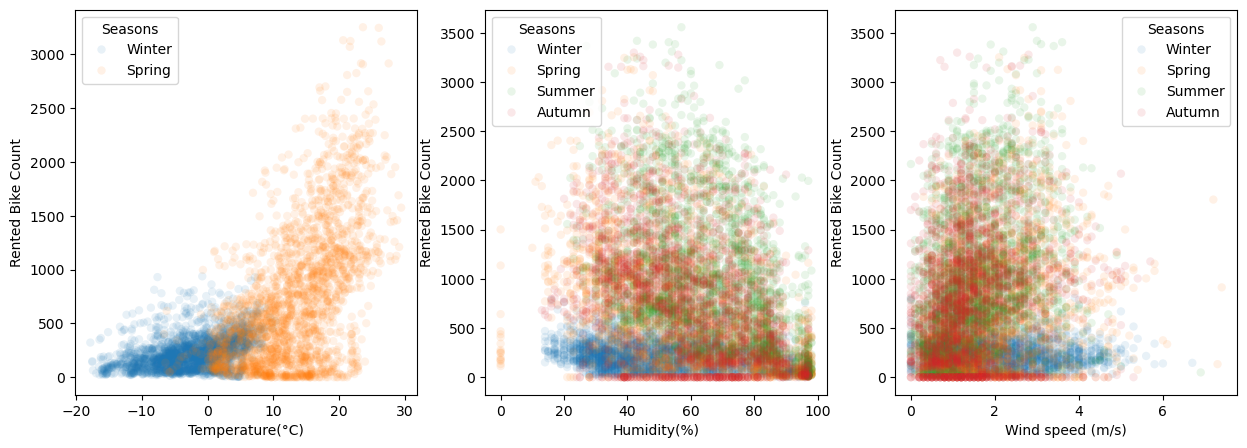

In [22]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
sns.scatterplot(x="Temperature(°C)", y="Rented Bike Count",
                sizes=(1, 8), linewidth=0,
                data=df[df['Seasons'].isin(['Winter', 'Spring'])], ax=axes[0], hue='Seasons', alpha=.1)
sns.scatterplot(x="Humidity(%)", y="Rented Bike Count",
                sizes=(1, 8), linewidth=0,
                data=df, ax=axes[1], hue='Seasons', alpha=.1)
sns.scatterplot(x="Wind speed (m/s)", y="Rented Bike Count",
                sizes=(1, 8), linewidth=0,
                data=df, ax=axes[2], hue='Seasons', alpha=.1)

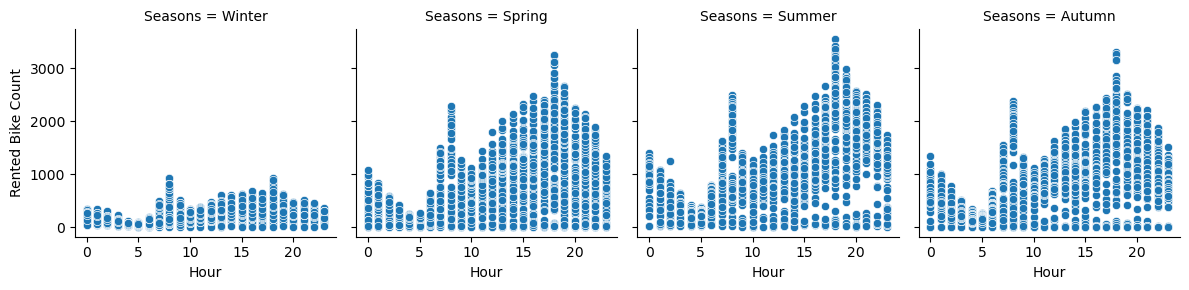

In [23]:

g = sns.FacetGrid(df, col="Seasons")
g.map(sns.scatterplot, "Hour", "Rented Bike Count"  )


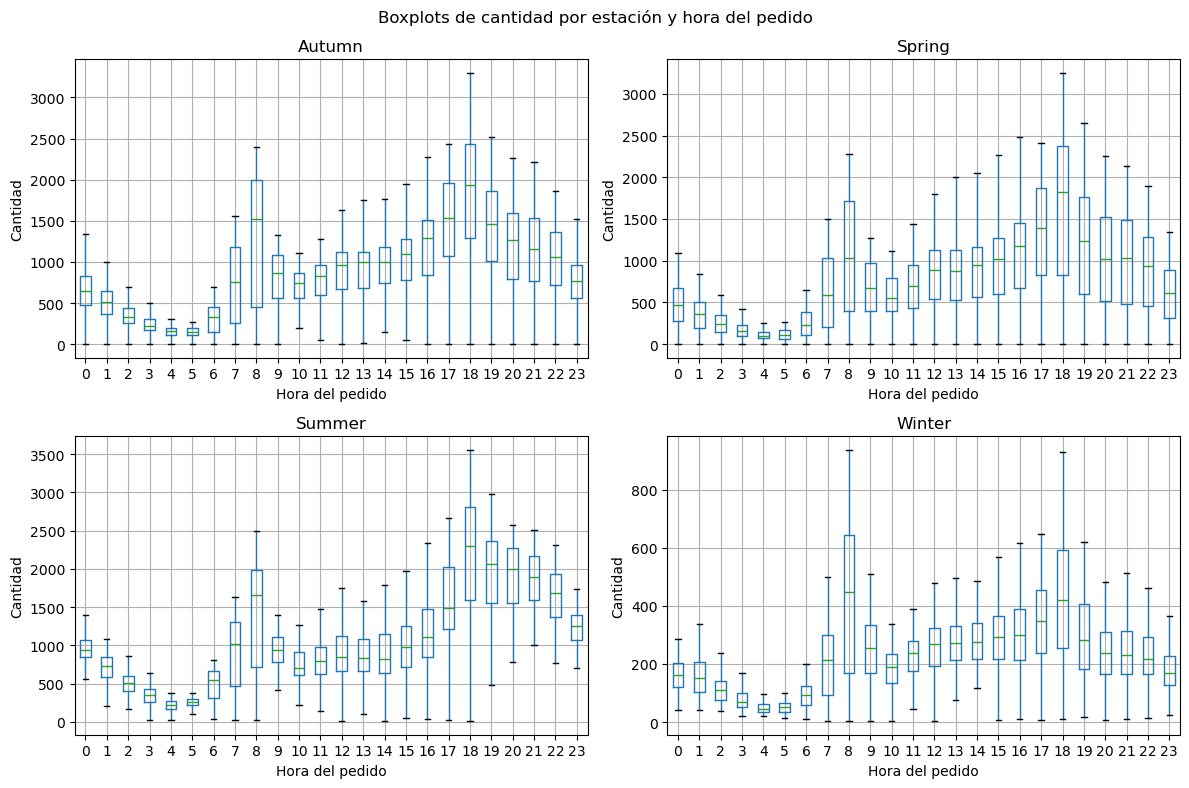

In [24]:
estaciones = df.groupby('Seasons')
estaciones = estaciones[['Seasons', 'Hour', 'Rented Bike Count']]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
contador = 0

for estacion, datos_estacion in estaciones:
    fila = contador // 2
    columna = contador % 2

    # Crear boxplot por hora del pedido
    datos_estacion.boxplot(by="Hour", ax=axes[fila, columna], showfliers=False)
    axes[fila, columna].set_title(estacion)
    axes[fila, columna].set_xlabel("Hora del pedido")
    axes[fila, columna].set_ylabel("Cantidad")

    contador += 1

fig.suptitle("Boxplots de cantidad por estación y hora del pedido")
plt.tight_layout()
plt.show()

<Axes: xlabel='Date', ylabel='Rented Bike Count'>

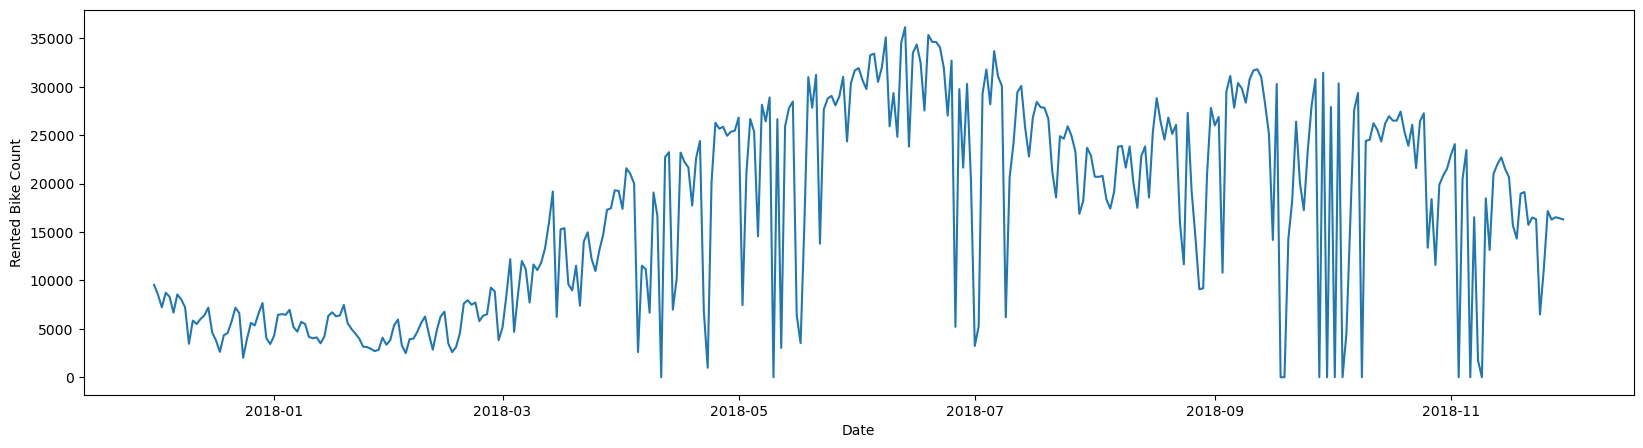

In [25]:
bikeRentYear = df.groupby('Date'). sum()


fig = plt.subplots(figsize=(20, 5))
sns.lineplot(data=bikeRentYear,
             x='Date',
             y='Rented Bike Count',
            )




<Axes: xlabel='Date', ylabel='Rented Bike Sum'>

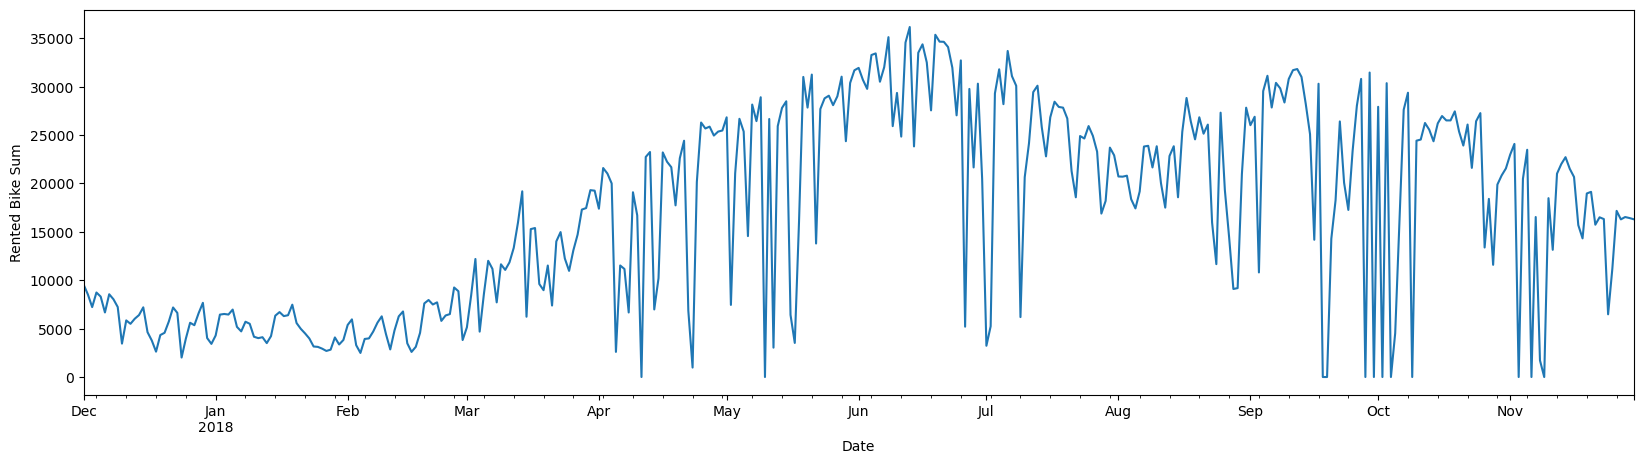

In [26]:
fig = plt.subplots(figsize=(20, 5))
bikeRentYear['Rented Bike Count'].plot.line(xlabel='Date', ylabel='Rented Bike Sum')